Krishna Penukonda

1001781

# Logistic Regression

 **Part (a)**:

> Probabilities lie in the range `[0, 1]`.

> In `Equation 1`, we multiply a potentially large number of probabilities, which would result in a vanishingly small value.
> Such values either result in inaccuracies or are computationally expensive to represent.

> If in its stead we use `Equation 2`, we could use the more computationally efficient addition operation without running into the vanishing value problem.

**Part (b)**:

## Import Dependencies

In [937]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

eps = np.finfo(np.float64).eps

## Define Model

In [938]:
class LogisticRegression:
    def __init__(self, model_dir="model", save_every=100, plot_every=100):
        self.save_every = save_every
        self.plot_every = plot_every
        self.model_dir = model_dir
        os.makedirs(self.model_dir, exist_ok=True)

    def concat_ones(self, x):
        """
        Add bias term to feature vector(s)
        """
        concat_shape = (1,) if len(x.shape) == 1 else (len(x), 1)
        return np.concatenate((np.ones(concat_shape), x), axis=-1)

    def fit(self, features, labels, lr=0.1, iterations=1):
        print(f"If saving is enabled, model parameter checkpoints will be saved to directory '{self.model_dir}'.")
        print("Training for {} iterations...".format(iterations or 'indefinite'))
        ll_history = []

        assert len(features) == len(labels)
        features = self.concat_ones(features)  # Add bias term to feature vectors
        self.W = np.zeros((features.shape[1])) # Initialize parameters to 0

        for i in itertools.count():  # Enables indefinite training by setting `iterations=0`
            if iterations and i == iterations:
                break
            index = np.random.randint(len(features))
            x = features[index]
            y_true = labels[index]
            y_pred = self.transform(x)
            self.W -= lr * (-y_true * x) / (1 + np.exp(y_true * y_pred))

            if self.save_every and i % self.save_every == 0:
                np.save(f"model/step_{i}", self.W)

            if self.plot_every and i % self.plot_every == 0:
                pred = self.transform(features)
                ll = self.log_likelihood(pred, labels)
                ll_history.append(ll)

        print("Finished training.")
        if self.plot_every:
            plt.figure(figsize=(14, 8))
            plt.plot([i * self.plot_every for i in range(len(ll_history))], ll_history)
            plt.xlabel("Iteration")
            plt.ylabel("Log-Likelihood")
            plt.show()

    def transform(self, x):
        if x.shape[-1] != self.W.shape[0]:
            x = self.concat_ones(x)
        return x.dot(self.W)

    def log_likelihood(self, y_pred, y_true):
        return 1 - np.mean(np.log(1 + np.exp(-y_pred * y_true)), axis=0)

    def evaluate(self, features, labels):
        y_pred = self.transform(features)
        ll = self.log_likelihood(y_pred, labels)
        print("Log-likelihood:", ll)

## Load Data

In [939]:
PATH = "HW3_data/4/diabetes_train.csv"
data = pd.read_csv(PATH, header=None).to_numpy()
x, y = data[:, 1:], data[:, 0]

## Train Model

If saving is enabled, model parameter checkpoints will be saved to directory 'model'.
Training for 10000 iterations...
Finished training.


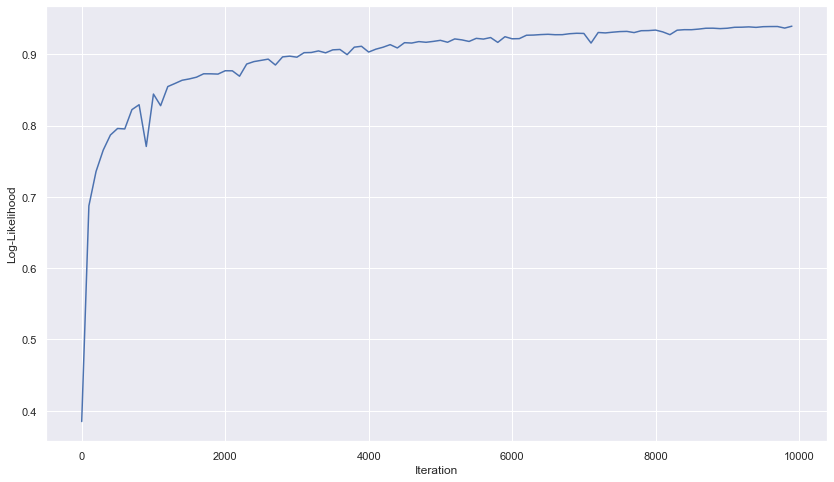

In [944]:
model = LogisticRegression()
model.fit(x, y, lr=0.1, iterations=10000)

In [943]:
model.evaluate(x, y)

Log-likelihood: 0.9393573917232596
